# Mano Dataset Analysis

Basic statistics and input range analysis for hand gesture images.


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("../data/raw/")


## 1. Dataset Overview


In [18]:
# Count images per letter
letter_counts = {}
all_images = []

for letter_dir in sorted(DATA_DIR.iterdir()):
    if letter_dir.is_dir():
        images = list(letter_dir.glob("*.jpg"))
        letter_counts[letter_dir.name] = len(images)
        all_images.extend(images)

print(f"Total images: {len(all_images)}")
print(f"Letters with data: {sum(1 for c in letter_counts.values() if c > 0)}")
print(f"\nImages per letter:")
for letter, count in letter_counts.items():
    if count > 0:
        print(f"  {letter.upper()}: {count}")


Total images: 3558
Letters with data: 26

Images per letter:
  A: 167
  B: 157
  C: 152
  D: 147
  E: 136
  F: 161
  G: 84
  H: 116
  I: 118
  J: 109
  K: 134
  L: 118
  M: 147
  N: 167
  O: 93
  P: 146
  Q: 146
  R: 165
  S: 124
  T: 143
  U: 143
  V: 134
  W: 134
  X: 141
  Y: 136
  Z: 140


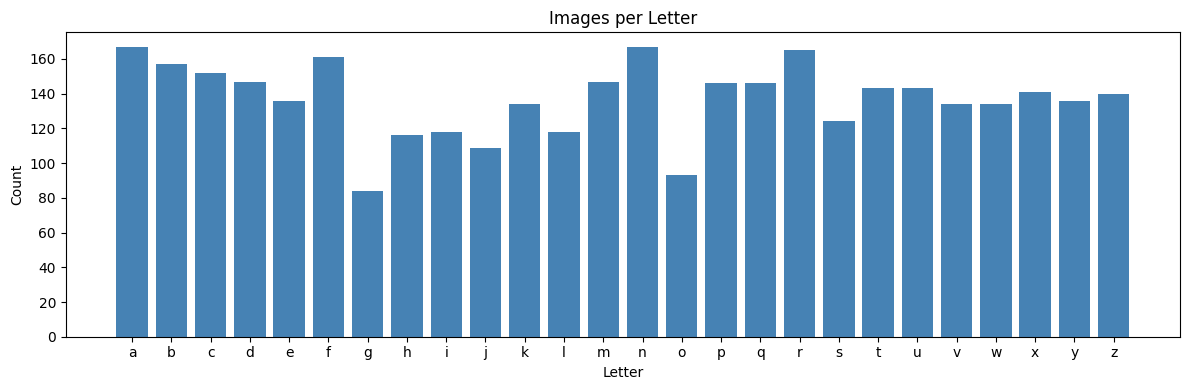

In [19]:
# Distribution bar chart
letters_with_data = {k: v for k, v in letter_counts.items() if v > 0}

if letters_with_data:
    plt.figure(figsize=(12, 4))
    plt.bar(letters_with_data.keys(), letters_with_data.values(), color='steelblue')
    plt.xlabel('Letter')
    plt.ylabel('Count')
    plt.title('Images per Letter')
    plt.tight_layout()
    plt.show()
else:
    print("No images found yet.")


## 2. Image Dimensions


In [4]:
# Analyze image sizes
widths = []
heights = []
aspect_ratios = []

for img_path in all_images:
    img = cv2.imread(str(img_path))
    if img is not None:
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)

if widths:
    print("Image Dimensions:")
    print(f"  Width  - min: {min(widths)}, max: {max(widths)}, mean: {np.mean(widths):.1f}, std: {np.std(widths):.1f}")
    print(f"  Height - min: {min(heights)}, max: {max(heights)}, mean: {np.mean(heights):.1f}, std: {np.std(heights):.1f}")
    print(f"  Aspect ratio - min: {min(aspect_ratios):.2f}, max: {max(aspect_ratios):.2f}, mean: {np.mean(aspect_ratios):.2f}")
else:
    print("No images to analyze.")


Image Dimensions:
  Width  - min: 121, max: 388, mean: 210.4, std: 40.0
  Height - min: 145, max: 423, mean: 273.7, std: 49.8
  Aspect ratio - min: 0.36, max: 1.68, mean: 0.79


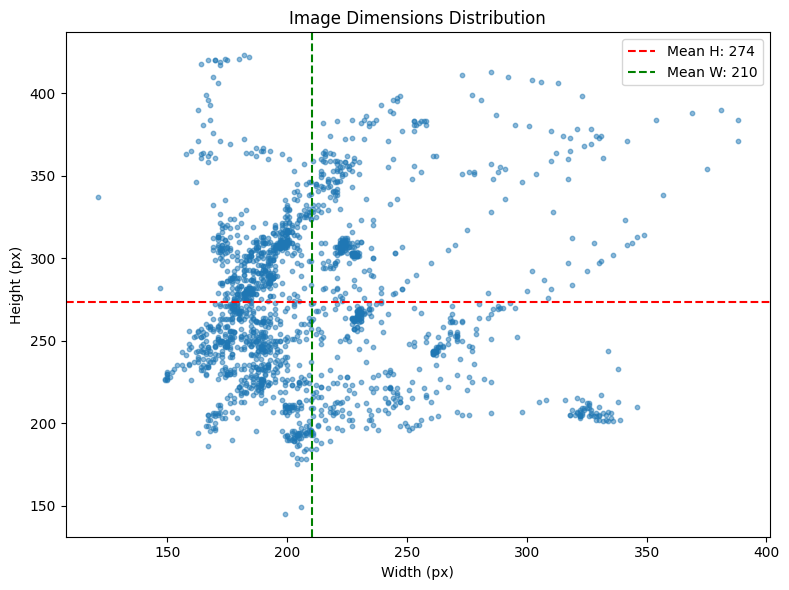

In [5]:
# Scatter plot of dimensions
if widths:
    plt.figure(figsize=(8, 6))
    plt.scatter(widths, heights, alpha=0.5, s=10)
    plt.xlabel('Width (px)')
    plt.ylabel('Height (px)')
    plt.title('Image Dimensions Distribution')
    plt.axhline(y=np.mean(heights), color='r', linestyle='--', label=f'Mean H: {np.mean(heights):.0f}')
    plt.axvline(x=np.mean(widths), color='g', linestyle='--', label=f'Mean W: {np.mean(widths):.0f}')
    plt.legend()
    plt.tight_layout()
    plt.show()


## 3. Pixel Value Range (Before Normalization)


In [6]:
# Sample images for pixel analysis (max 100 for speed)
sample_images = all_images[:100] if len(all_images) > 100 else all_images

all_mins = []
all_maxs = []
all_means = []
all_stds = []
channel_means = {'B': [], 'G': [], 'R': []}
channel_stds = {'B': [], 'G': [], 'R': []}

for img_path in sample_images:
    img = cv2.imread(str(img_path))
    if img is not None:
        all_mins.append(img.min())
        all_maxs.append(img.max())
        all_means.append(img.mean())
        all_stds.append(img.std())
        
        # Per-channel stats (BGR order in OpenCV)
        for i, ch in enumerate(['B', 'G', 'R']):
            channel_means[ch].append(img[:, :, i].mean())
            channel_stds[ch].append(img[:, :, i].std())

if all_mins:
    print(f"Pixel Value Statistics (sampled {len(sample_images)} images):")
    print(f"  Range: [{min(all_mins)}, {max(all_maxs)}] (expected [0, 255])")
    print(f"  Mean pixel value: {np.mean(all_means):.2f} ± {np.std(all_means):.2f}")
    print(f"  Std pixel value: {np.mean(all_stds):.2f} ± {np.std(all_stds):.2f}")
    print(f"\nPer-channel means (BGR):")
    for ch in ['B', 'G', 'R']:
        print(f"  {ch}: {np.mean(channel_means[ch]):.2f} ± {np.std(channel_means[ch]):.2f}")
else:
    print("No images to analyze.")


Pixel Value Statistics (sampled 100 images):
  Range: [17, 243] (expected [0, 255])
  Mean pixel value: 134.33 ± 7.95
  Std pixel value: 41.66 ± 4.63

Per-channel means (BGR):
  B: 132.83 ± 8.22
  G: 129.21 ± 8.13
  R: 140.96 ± 7.67


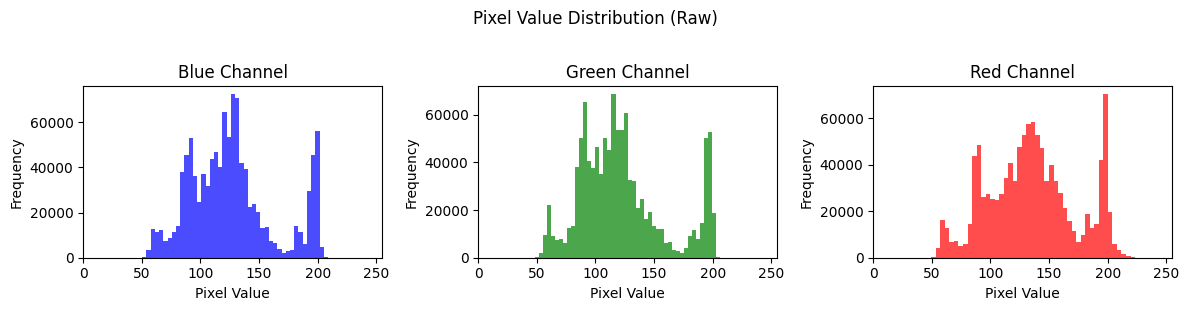

In [7]:
# Histogram of pixel values from sample images
if sample_images:
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    colors = ['blue', 'green', 'red']
    channel_names = ['Blue', 'Green', 'Red']
    
    sample_for_hist = sample_images[:20]
    
    for i, (ax, color, name) in enumerate(zip(axes, colors, channel_names)):
        all_pixels = []
        for img_path in sample_for_hist:
            img = cv2.imread(str(img_path))
            if img is not None:
                all_pixels.extend(img[:, :, i].flatten())
        
        ax.hist(all_pixels, bins=50, color=color, alpha=0.7)
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{name} Channel')
        ax.set_xlim(0, 255)
    
    plt.suptitle('Pixel Value Distribution (Raw)', y=1.02)
    plt.tight_layout()
    plt.show()


In [8]:
# Common normalization strategies
def normalize_01(img):
    """Scale to [0, 1]"""
    return img.astype(np.float32) / 255.0

def normalize_minus1_1(img):
    """Scale to [-1, 1]"""
    return (img.astype(np.float32) / 127.5) - 1.0

def normalize_imagenet(img):
    """ImageNet normalization (RGB order)"""
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (img - mean) / std

if sample_images:
    test_img = cv2.imread(str(sample_images[0]))
    
    print("Normalization comparison (single image):")
    print(f"\nRaw:")
    print(f"  Range: [{test_img.min()}, {test_img.max()}]")
    print(f"  Mean: {test_img.mean():.2f}, Std: {test_img.std():.2f}")
    
    norm_01 = normalize_01(test_img)
    print(f"\n[0, 1] normalization:")
    print(f"  Range: [{norm_01.min():.3f}, {norm_01.max():.3f}]")
    print(f"  Mean: {norm_01.mean():.3f}, Std: {norm_01.std():.3f}")
    
    norm_11 = normalize_minus1_1(test_img)
    print(f"\n[-1, 1] normalization:")
    print(f"  Range: [{norm_11.min():.3f}, {norm_11.max():.3f}]")
    print(f"  Mean: {norm_11.mean():.3f}, Std: {norm_11.std():.3f}")
    
    norm_inet = normalize_imagenet(test_img)
    print(f"\nImageNet normalization:")
    print(f"  Range: [{norm_inet.min():.3f}, {norm_inet.max():.3f}]")
    print(f"  Mean: {norm_inet.mean():.3f}, Std: {norm_inet.std():.3f}")
else:
    print("No images to test normalization.")


Normalization comparison (single image):

Raw:
  Range: [43, 222]
  Mean: 128.17, Std: 36.47

[0, 1] normalization:
  Range: [0.169, 0.871]
  Mean: 0.503, Std: 0.143

[-1, 1] normalization:
  Range: [-0.663, 0.741]
  Mean: 0.005, Std: 0.286

ImageNet normalization:
  Range: [-1.283, 1.838]
  Mean: 0.237, Std: 0.637


## 5. Sample Images Preview


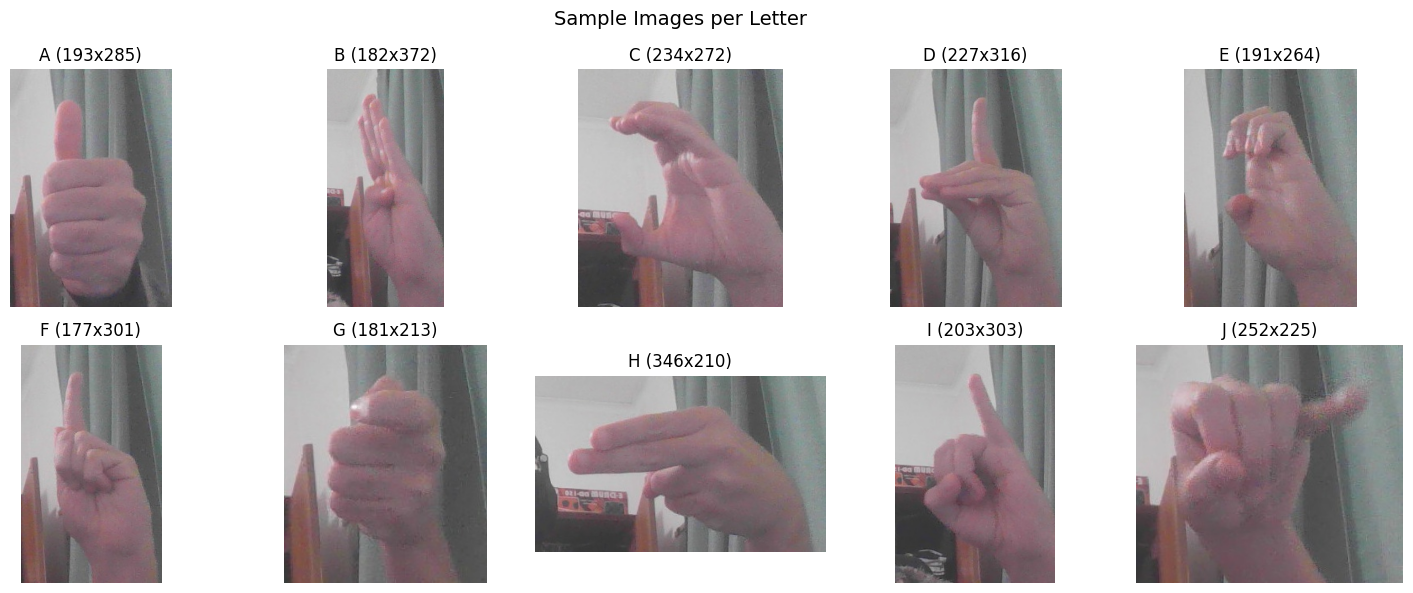

In [9]:
# Show sample images from each letter
letters_with_images = [k for k, v in letter_counts.items() if v > 0]

if letters_with_images:
    n_letters = min(len(letters_with_images), 10)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, letter in enumerate(letters_with_images[:n_letters]):
        letter_dir = DATA_DIR / letter
        img_path = next(letter_dir.glob("*.jpg"), None)
        
        if img_path:
            img = cv2.imread(str(img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)
            axes[i].set_title(f"{letter.upper()} ({img.shape[1]}x{img.shape[0]})")
        axes[i].axis('off')
    
    for i in range(n_letters, 10):
        axes[i].axis('off')
    
    plt.suptitle('Sample Images per Letter', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")


## 6. Summary


In [10]:
print("=" * 50)
print("DATASET SUMMARY")
print("=" * 50)

if all_images:
    print(f"Total images: {len(all_images)}")
    print(f"Classes (letters): {len(letters_with_data)}")
    print(f"\nClass balance:")
    counts = list(letters_with_data.values())
    print(f"  Min: {min(counts)}, Max: {max(counts)}, Mean: {np.mean(counts):.1f}")
    
    print(f"\nImage dimensions:")
    print(f"  Width: {np.mean(widths):.0f} ± {np.std(widths):.0f} px")
    print(f"  Height: {np.mean(heights):.0f} ± {np.std(heights):.0f} px")
    
    print(f"\nPixel values (raw):")
    print(f"  Range: [0, 255] (uint8)")
    print(f"  Mean: {np.mean(all_means):.1f}")
    
    print(f"\nRecommended preprocessing:")
    print(f"  1. Resize to consistent size (e.g., 224x224)")
    print(f"  2. Use ImageNet normalization if using pretrained models")
    print(f"  3. Consider data augmentation for class balance")
else:
    print("No data collected yet. Run capture_data.py first.")


DATASET SUMMARY
Total images: 1871
Classes (letters): 26

Class balance:
  Min: 46, Max: 129, Mean: 72.0

Image dimensions:
  Width: 210 ± 40 px
  Height: 274 ± 50 px

Pixel values (raw):
  Range: [0, 255] (uint8)
  Mean: 134.3

Recommended preprocessing:
  1. Resize to consistent size (e.g., 224x224)
  2. Use ImageNet normalization if using pretrained models
  3. Consider data augmentation for class balance
